# Importowanie bibliotek

W tej komórce importujemy trzy biblioteki, które będą używane w dalszej części notebooka:
1. `matplotlib.pyplot` jako `plt` - biblioteka do tworzenia wykresów i wizualizacji danych.
2. `pandas` jako `pd` - biblioteka do manipulacji i analizy danych w formie tabelarycznej.
3. `pipeline` z `transformers` - funkcja z biblioteki transformers, która umożliwia łatwe korzystanie z modeli NLP (Natural Language Processing).

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from transformers import pipeline

# Inicjalizacja pipeline do analizy sentymentu

W tej komórce inicjalizujemy pipeline do analizy sentymentu z użyciem modelu `nlptown/bert-base-multilingual-uncased-sentiment`. Pipeline ten umożliwia analizę sentymentu tekstu w wielu językach, w tym w języku polskim.

In [4]:
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

Device set to use cuda:0


# Przykładowe komentarze do analizy

W tej komórce definiujemy listę przykładowych komentarzy, które będą analizowane pod kątem sentymentu. Komentarze te są napisane w języku polskim i obejmują zarówno pozytywne, jak i negatywne opinie na temat produktu.

In [9]:
comments = [
    "Ten produkt jest niesamowity! Naprawdę mi się podoba.",
    "Nie polecam tego, bardzo rozczarowany.",
    "Średni produkt, nic specjalnego.",
    "Absolutnie fantastyczny, robi cuda!",
    "Bardzo słaba jakość, żałuję zakupu.",
    "Jestem zachwycony, super jakość i szybka dostawa.",
    "Produkt ok, ale mogło być lepiej.",
    "Najgorsze doświadczenie, kompletnie się nie sprawdził."
]

# Analiza sentymentu i wyświetlenie wyników

W tej komórce przeprowadzamy analizę sentymentu dla każdego komentarza z listy `comments` za pomocą wcześniej zainicjalizowanego pipeline `sentiment_pipeline`. Wyniki analizy są następnie wyświetlane w formie tekstowej, gdzie dla każdego komentarza pokazujemy jego treść oraz wynik analizy sentymentu.

In [ ]:
results = sentiment_pipeline(comments)

for comment, result in zip(comments, results):
    print("Komentarz:", comment)
    print("Wynik analizy:", result)
    print("-----")

Komentarz: Ten produkt jest niesamowity! Naprawdę mi się podoba.
Wynik analizy: {'label': '2 stars', 'score': 0.4008887708187103}
-----
Komentarz: Nie polecam tego, bardzo rozczarowany.
Wynik analizy: {'label': '1 star', 'score': 0.697340190410614}
-----
Komentarz: Średni produkt, nic specjalnego.
Wynik analizy: {'label': '3 stars', 'score': 0.5476382970809937}
-----
Komentarz: Absolutnie fantastyczny, robi cuda!
Wynik analizy: {'label': '5 stars', 'score': 0.9242027997970581}
-----
Komentarz: Bardzo słaba jakość, żałuję zakupu.
Wynik analizy: {'label': '2 stars', 'score': 0.48955705761909485}
-----
Komentarz: Jestem zachwycony, super jakość i szybka dostawa.
Wynik analizy: {'label': '5 stars', 'score': 0.7964646816253662}
-----
Komentarz: Produkt ok, ale mogło być lepiej.
Wynik analizy: {'label': '3 stars', 'score': 0.7333406209945679}
-----
Komentarz: Najgorsze doświadczenie, kompletnie się nie sprawdził.
Wynik analizy: {'label': '1 star', 'score': 0.41465744376182556}
-----
Komentar

# Mapowanie wyników analizy na kategorie sentymentu

W tej komórce definiujemy funkcję `map_sentiment`, która mapuje etykiety wyników analizy sentymentu na kategorie: "Negatywne", "Neutralne" i "Pozytywne". Funkcja ta przyjmuje etykietę w formacie "X stars" (gdzie X to liczba gwiazdek) i zwraca odpowiednią kategorię sentymentu.

In [ ]:
def map_sentiment(label):
    stars = int(label.split()[0])
    if stars <= 2:
        return "Negatywne"
    elif stars == 3:
        return "Neutralne"
    else:
        return "Pozytywne"

# Tworzenie DataFrame z wynikami analizy sentymentu

W tej komórce tworzymy DataFrame z wynikami analizy sentymentu. Dodajemy kolumny "Komentarz" i "Kategoria" do DataFrame, gdzie "Komentarz" zawiera oryginalne komentarze, a "Kategoria" zawiera zmapowane kategorie sentymentu (Negatywne, Neutralne, Pozytywne). Na końcu wyświetlamy podsumowanie wyników.

In [1]:
df = pd.DataFrame(results)
df["Komentarz"] = comments
df["Kategoria"] = df["label"].apply(map_sentiment)

print("Podsumowanie wyników:")
print(df)

NameError: name 'pd' is not defined

# Wizualizacja rozkładu sentymentów komentarzy

W tej komórce tworzymy wykres słupkowy przedstawiający rozkład sentymentów komentarzy. Najpierw obliczamy liczbę komentarzy w każdej kategorii sentymentu (Negatywne, Neutralne, Pozytywne) za pomocą `value_counts()`. Następnie tworzymy wykres słupkowy z użyciem `matplotlib`, ustawiając odpowiednie tytuły i etykiety osi.

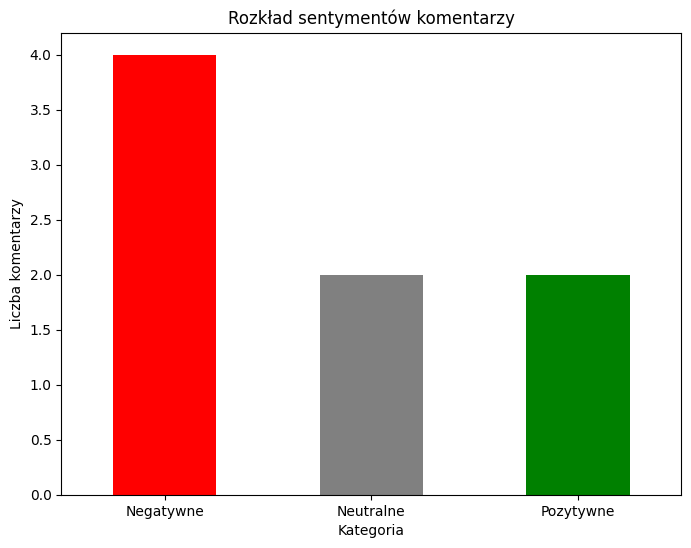

In [ ]:
sentiment_counts = df["Kategoria"].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title("Rozkład sentymentów komentarzy")
plt.xlabel("Kategoria")
plt.ylabel("Liczba komentarzy")
plt.xticks(rotation=0)
plt.show()